# Dependencies

In [4]:
import pandas as pd
import numpy as np
import warnings
import sys
from pathlib import Path
import gpytorch

# Import Thermal Tracks modules
project_root = Path().resolve().parents[0]
src_path = project_root / 'src'
sys.path.append(str(src_path))

from gp_downstream_analysis import *

# Load Thermal Tracks results for $E. coli$ lysate treated with $MgCl_2$

In [16]:
# Load results
example_data_path = project_root / 'Example_data/input_dataframes'
results_dir = Path(example_data_path) / "Mateus_MgCl2_2018" / "results"

parameters = {
"result_dir" : rf"{results_dir}/",
"subset_test" : False,
"lengthscale_prior": gpytorch.priors.GammaPrior(10, 1),
"lengthscale_minconstraint" : 'max',
"lengthscale_mult" : 1, 
"control_condition": "lysate",
"perturbation" : "lysate_MgCl2",
"training_iterations" : 150, 
"learningRate" : 0.1,
"amsgrad" : False, 
"n_predictions" : 50, 
"create_plots" : False, 
"exclude_poor_fits" : False,
"samples_per_id" : 10}
warnings.filterwarnings("ignore")

res_dict_mateus = import_gp_result_dict(parameters)

# Plot result plots (can take a bit of time - for each identified protein, a pdf file is generated)

In [ ]:
generate_result_plots(res_dict_mateus, parameters)

# Compute effect size

In [17]:
analysis_res_dict_mateus = compute_effect_size(res_dict_mateus, parameters, strict_auc = False)

# Plot circular Manhattan plot visualizing effect size vs p-Value

A circular Manhattan plot has been created: /Users/johannes/Work/Thermal Tracks/Example_data/input_dataframes/Mateus_MgCl2_2018/results//thermal_stability_changes_lysate_MgCl2_vs_lysate


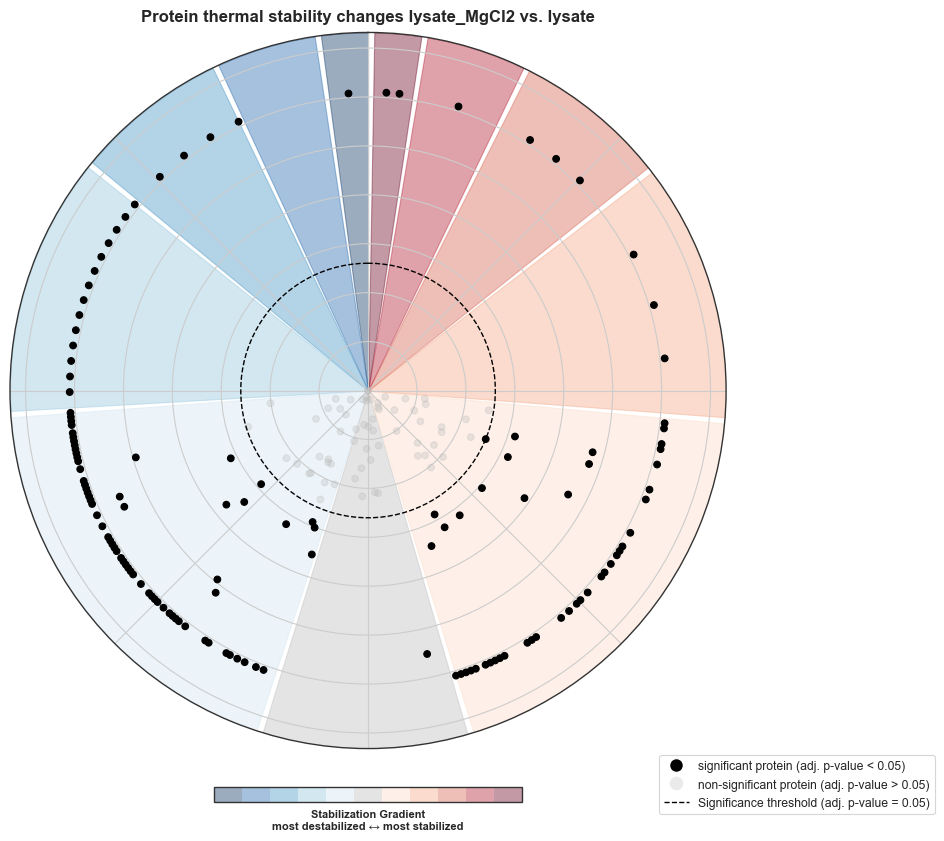

In [18]:
analysis_res_dict_mateus = plot_manhattan(analysis_res_dict_mateus, parameters, pvalue='adj_pValue', figsize=[10,10], fill_to_end = True)

# Plot example fit

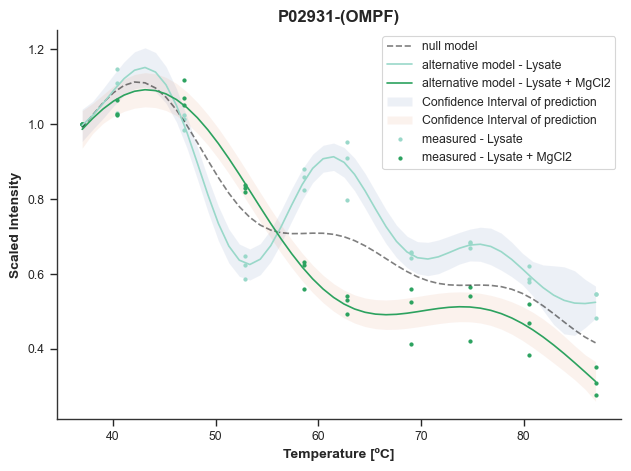

In [24]:
import matplotlib.pyplot as plt

protein_of_interest = 'P02931-(OMPF)'
predictions_df = analysis_res_dict_mateus['gp_result_df'].copy()
test = predictions_df[predictions_df['uniqueID'] == protein_of_interest]


# Setup a figure with 5 subplots (panels)
plt.plot('x', 'y', label='null model', data = test[(test['type'] == 'fitted') & (test['condition'] == 'joint')], color = 'black', linestyle = '--', alpha=0.5)
plt.plot('x', 'y', label='alternative model - Lysate', data = test[(test['type'] == 'fitted') & (test['condition'] == 'lysate')], color = '#99d8c9', linestyle = '-')
plt.plot('x', 'y', label='alternative model - Lysate + MgCl2', data = test[(test['type'] == 'fitted') & (test['condition'] == 'lysate_MgCl2')], color = '#2ca25f', linestyle = '-')
plt.fill_between(data = test[(test['type'] == 'fitted') & (test['condition'] == 'lysate')], x = 'x', y1= 'conf_upper', y2='conf_lower', alpha=0.1, label='Confidence Interval of prediction')
plt.fill_between(data = test[(test['type'] == 'fitted') & (test['condition'] == 'lysate_MgCl2')], x = 'x', y1= 'conf_upper', y2='conf_lower', alpha=0.1, label='Confidence Interval of prediction')
# Plot samples from the posterior and marginal likelihood GPs
plt.scatter('x', 'y', label='measured - Lysate', data = test[(test['type'] == 'measured') & (test['condition'] == 'lysate')], color = '#99d8c9', s=5)
plt.scatter('x', 'y', label='measured - Lysate + MgCl2', data = test[(test['type'] == 'measured') & (test['condition'] == 'lysate_MgCl2')], color = '#2ca25f', s=5) 
plt.title(f'{protein_of_interest}', size=12, weight='bold')
plt.xlabel('Temperature [ºC]', size=10, weight='bold')
plt.ylabel('Scaled Intensity', size=10, weight='bold')
plt.legend()

plt.tight_layout()
plt.show()